# Linear Regression



<img src= 'https://frenzy86.s3.eu-west-2.amazonaws.com/fav/lin_reg.png' width=600>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

In [2]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/datalr.csv

In [3]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/datalr.csv"

Text(0.5, 1.0, 'Dataset')

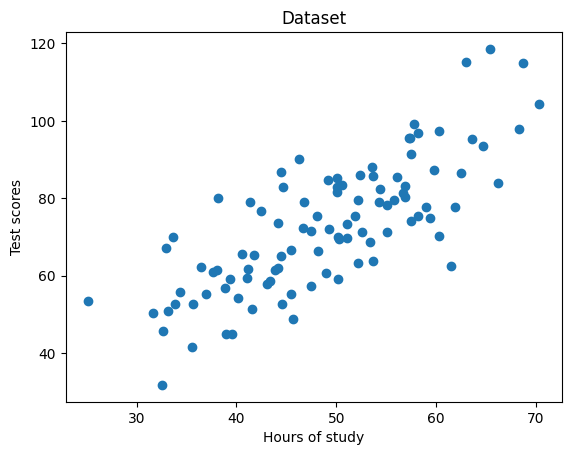

In [4]:
points = np.genfromtxt(path, delimiter=',')

#Extract columns
x = np.array(points[:,0])
y = np.array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
#plt.show()

#### Defining the hyperparamters

In [5]:
#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_w = 0
num_iterations = 10

#### Define cost function

In [6]:
def compute_cost(b, w, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (w * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

#### Define Gradient Descent functions

In [7]:
def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    cost_graph = []

    #For every iteration, optimize b, w and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, w, points))
        b, w = step_gradient(b, w, np.array(points), learning_rate)

    return [b, w, cost_graph]

def step_gradient(b_current, w_current, points, learning_rate):
    w_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        w_gradient += - (2/N) * x * (y - (w_current * x + b_current))
        b_gradient += - (2/N) * (y - (w_current * x + b_current))
    
    #Update current w and b
    w_updated = w_current - learning_rate * w_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, w_updated

#### Run gradient_descent_runner() to get optimized parameters b and m

In [8]:
b, w, cost_graph = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized w:', w)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, w, points))

Optimized b: 0.02963934787473239
Optimized w: 1.4774173755483797
Minimized cost: 112.65585181499746


#### Plotting the cost per iterations

Text(0.5, 1.0, 'Minimization Cost per iteration')

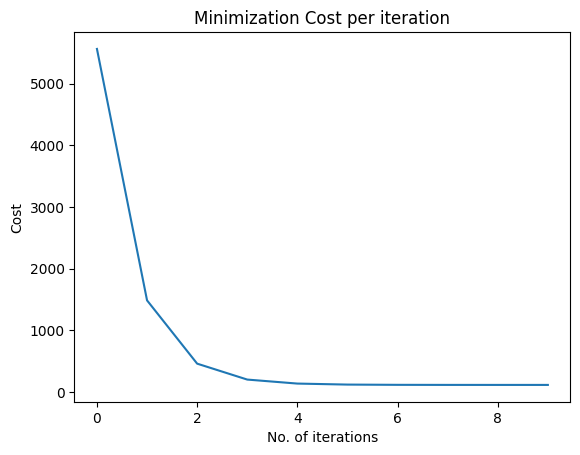

In [9]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Minimization Cost per iteration')
#plt.show()

Gradient descent converges to local minimum after 5 iterations

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/lr.gif">


#### Plot line of best fit

Text(0.5, 1.0, 'Line of best fit')

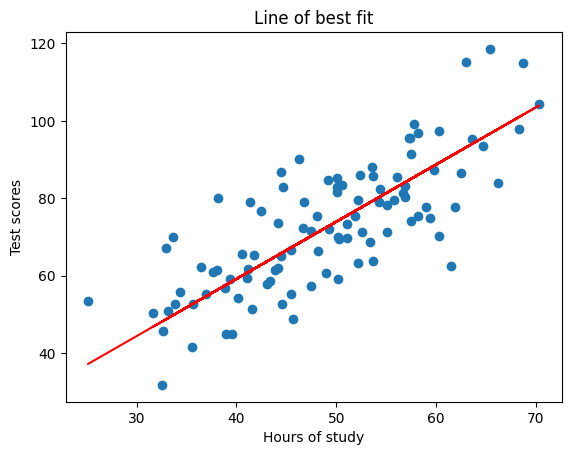

In [10]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = w*x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
#plt.show()

## Life is easier with Sklearn <3

Text(0.5, 1.0, 'Original Dataset')

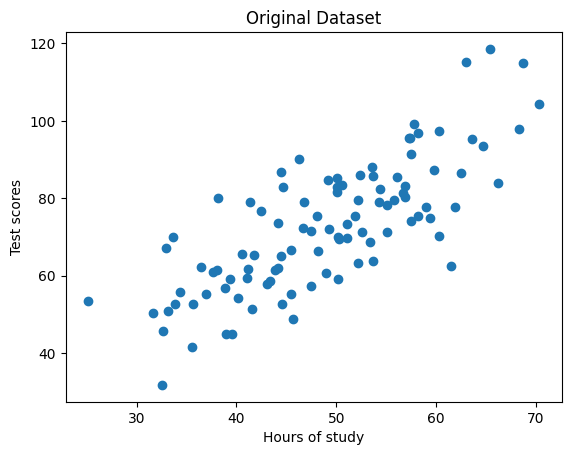

In [11]:
points = np.genfromtxt(path, delimiter=',')

#Extract columns
x = np.array(points[:,0])
y = np.array(points[:,1])

#Plot the dataset
plt.scatter(x,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Original Dataset')
#plt.show()

In [12]:
# Verifica dimensionalità!!!
x.ndim

1

In [13]:
x.reshape(-1, 1).ndim

2

In [14]:
X = x.reshape(-1, 1) # features
y = y # target continua --> regressione!!!

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

LinearRegression()

In [16]:
# Beta regressor
model.coef_

array([1.32243102])

In [17]:
# Intercept
model.intercept_

7.991020982270399

In [ ]:
# y = 7.99 + 1.32*x

In [18]:
y_pred = model.predict(X)

Text(0.5, 1.0, 'Simple Linear Regression')

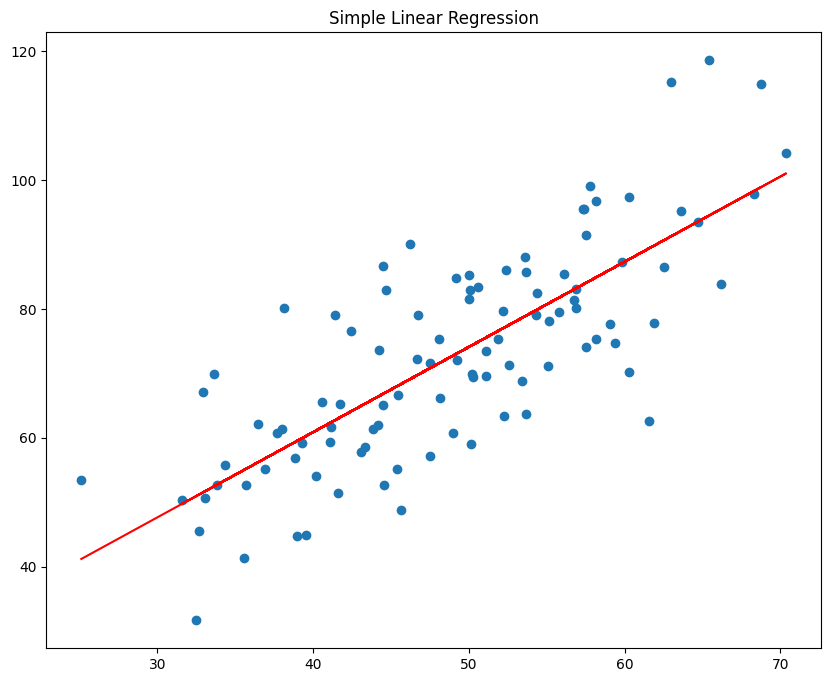

In [19]:
plt.figure(figsize = (10, 8))

plt.scatter(x, y)
plt.plot(x, y_pred,'-r');
plt.title('Simple Linear Regression')

Text(0.5, 0, 'Errors')

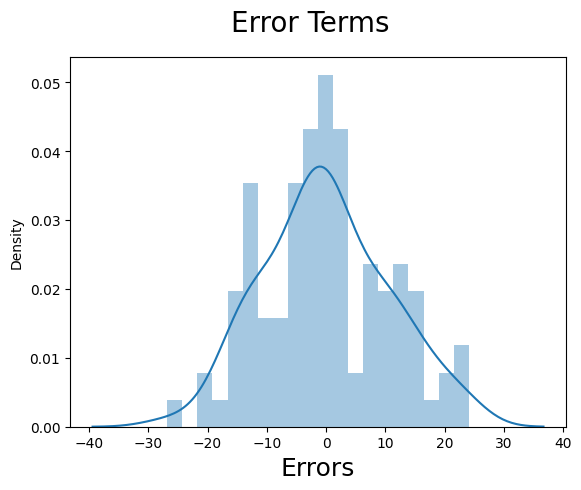

In [20]:
import seaborn as sns

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         

In [21]:
import plotly.express as px

fig = px.scatter(x=x, y=y, opacity=0.65,
                trendline='ols', trendline_color_override='darkblue',width=800
                )
fig.show()

## Train Test Set

The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris_8.png' width=650>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 667
                                                    )

In [ ]:
X_train.shape, X_test.shape

((80, 1), (20, 1))

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([1.28944624])

In [ ]:
model.intercept_

9.664498626786127

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
res_df = pd.DataFrame(data=list(zip(y_pred, y_test)),columns=['predicted', 'real'])
res_df

,predicted,real
0,65.521095,58.569825
1,62.766495,61.684038
2,81.622992,79.550437
3,83.813503,91.486778
4,76.988804,79.641973
5,83.035556,80.207523
6,73.110266,84.742698
7,83.813392,74.084130
8,53.935217,55.723489
9,74.187842,85.232007


In [ ]:
res_df['error'] = res_df['real'] - res_df['predicted']
res_df

,predicted,real,error
0,65.521095,58.569825,-6.951271
1,62.766495,61.684038,-1.082457
2,81.622992,79.550437,-2.072555
3,83.813503,91.486778,7.673275
4,76.988804,79.641973,2.653169
5,83.035556,80.207523,-2.828033
6,73.110266,84.742698,11.632431
7,83.813392,74.084130,-9.729262
8,53.935217,55.723489,1.788272
9,74.187842,85.232007,11.044166


In [ ]:
res_df['error'].mean()

-0.29298732665546756

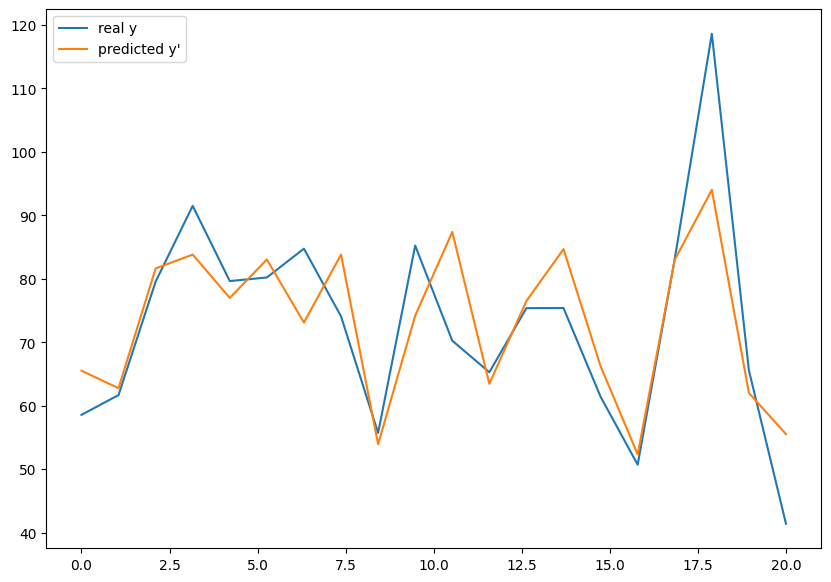

In [ ]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2);

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y_test, name="real", mode="lines"))
fig.add_trace(go.Scatter(x=x, y=y_pred, name="predicted", mode="lines"))
fig.update_layout(title="Error from prediction on Test Set", xaxis_title="Obeservation", yaxis_title="Value",width=900)
fig.show()

## Ripetere esercizio di ML Linear Regression con dati generati random secondo l'equazione y=3x+epsylon

In [ ]:
generate_random = np.random.RandomState(667)
x = 10 * generate_random.rand(100)

#y =  3 * x + ..............

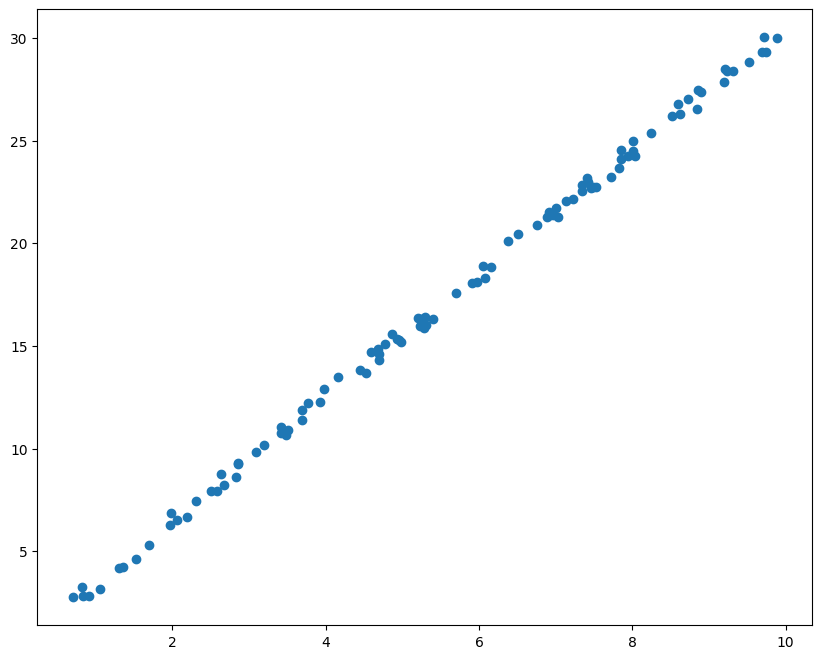

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(x, y);

In [ ]:
## definire vettore Feature e target X y ...

## Multiple Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objs as go

# create sample data
np.random.seed(667)
n_samples = 100
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)
y = 2*x1 + 3*x2 + np.random.randn(n_samples)

# create pandas dataframe
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# perform multiple linear regression
X = df[['x1', 'x2']]
y = df['y']
model = LinearRegression().fit(X, y)

# create 3D scatter plot and plane prediction
x1_range = np.linspace(df['x1'].min(), df['x1'].max(), 10)
x2_range = np.linspace(df['x2'].min(), df['x2'].max(), 10)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
##Prediction Plane
zz = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
zz = zz.reshape(xx1.shape)

In [ ]:
model.intercept_

-0.011797844655702494

In [ ]:
model.coef_

array([2.04980515, 3.03499985])

In [ ]:
# y = -0.0118 + 2.05*x1+ 3.035*x2

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['x1'], y=df['x2'], z=df['y'], mode='markers', name='Data Points'))
fig.add_trace(go.Surface(x=xx1, y=xx2, z=zz, opacity=0.9, name='Plane Prediction'))
fig.update_layout(title='Plane Prediction', scene=dict(xaxis_title='x1', yaxis_title='x2', zaxis_title='y'))
fig.show()

In [ ]:
# make a plane prediction
x1_pred = 1.5
x2_pred = 0.5
y_pred = model.predict([[x1_pred, x2_pred]])
print('Predicted y value for x1 = {} and x2 = {}: {}'.format(x1_pred, x2_pred, y_pred[0]))

Predicted y value for x1 = 1.5 and x2 = 0.5: 4.580409809783164


In [ ]:
##esercizio regressione lineare Multipla

#https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Startup.csv

In [ ]:
#https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Company.csv